In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
from functions_preprocessing import combine_image_folders, erase_double_images, train_test

import functions_licenseplate as fl

import functions_recognition as r

import SVC as svc

import CNN as cnn

import API_car_model as api

In [2]:
"""
source_folders = [
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",
    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"
]

destination_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
combine_image_folders(source_folders, destination_folder) #ALREADY CREATED
"""

'\nsource_folders = [\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS MERI",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/FOTOS LARA",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Frontal",\n    "G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Images/Images (CV)/Lateral"\n]\n\ndestination_folder = \'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES\'\ncombine_image_folders(source_folders, destination_folder) #ALREADY CREATED\n'

In [3]:
"""
folder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'
erase_double_images(folder_path)
"""

"\nfolder_path = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'\nerase_double_images(folder_path)\n"

In [4]:
"""
source_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  
train_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    
test_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     
val_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'
# Call the train_test function to perform the split
train_test(source_folder, train_folder, test_folder, val_folder)
"""

"\nsource_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_IMAGES'  \ntrain_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'    \ntest_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_testset'     \nval_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_validationset'\n# Call the train_test function to perform the split\ntrain_test(source_folder, train_folder, test_folder, val_folder)\n"

In [5]:
"""
image_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'
cropped_plates_train = yolo.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image
"""

"\nimage_folder_2 = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset'\ncropped_plates_train = yolo.boundingbox(image_folder_2)#dictionary name plate (sequence) + croppedd image\n"

In [6]:
"""
save_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
fl.display_and_save_cropped_plates(cropped_plates_train, save_folder)
"""

"\nsave_folder = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'\nfl.display_and_save_cropped_plates(cropped_plates_train, save_folder)\n"

In [64]:
pc_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/GITHUB_trainset_croppedimages'
pc_miguel = 'G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//GITHUB_trainset_croppedimages'

file_list = os.listdir(pc_miguel)
image_extensions = ['.jpg', '.jpeg', '.png']
image_files = [file for file in file_list if os.path.splitext(file)[1].lower() in image_extensions]

In [69]:
random_image = random.choice(image_files)
random_image_path = os.path.join(pc_miguel, random_image)

In [70]:
image = cv2.imread(random_image_path)

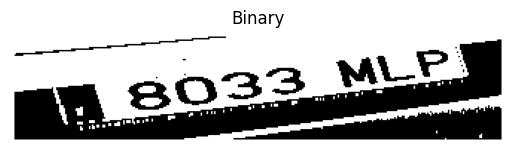

In [72]:
segmented_chars = fl.segment_characters(image)

for idx, char in enumerate(segmented_chars):
    plt.subplot(1, len(segmented_chars), idx + 1)
    plt.imshow(char, cmap='gray')
    plt.axis('off')
plt.show()



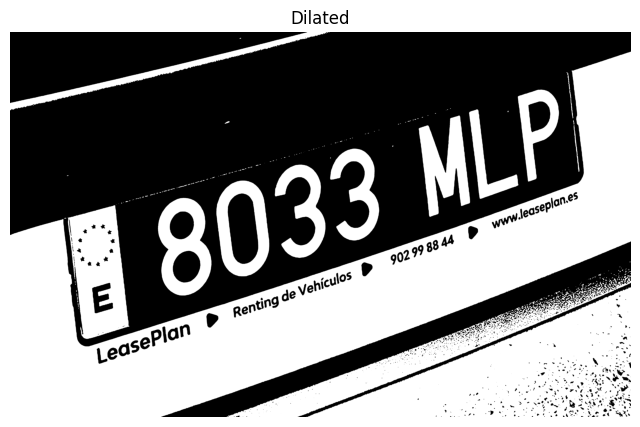

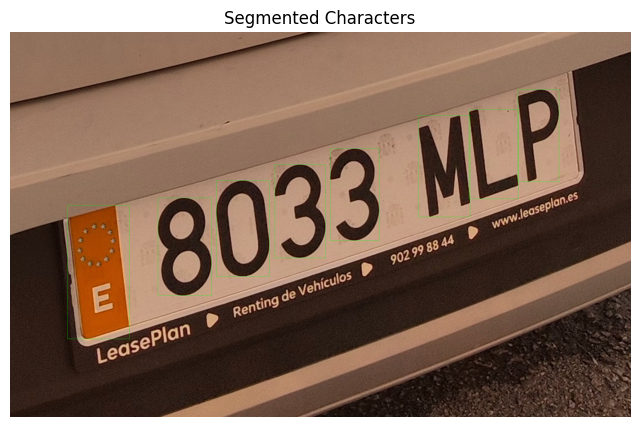

In [73]:
car = image.copy()
characters = r.OCR_image(license_plate = image, t = 180 ,min_h = 80, min_w = 20, min_ar = 0.2, max_ar = 1.4, area = 6000)

In [62]:
for i in range(len(characters)):
  #save the files to expand the dataset
  output_path = os.path.join("G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//Dataset Characters", f'caracter_{i}.png')
  cv2.imwrite(output_path, characters[i])

In [12]:
base_path_lara = 'G:/Mi unidad/LICENSE_PLATES_RECOGITION_L&V/Dataset Characters'
base_path_miguel = 'G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//Dataset Characters'

accuracy, clf, scaler, label_encoder = svc.train_svm_and_get_accuracy(base_path_miguel)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 85.71%


0.18730128057504672
0.3720039002751895
0.5058889486313233
0.4999956182012086
0.5043458320463512
0.1537501497556278
0.17607673656824052
0.24216443568643853


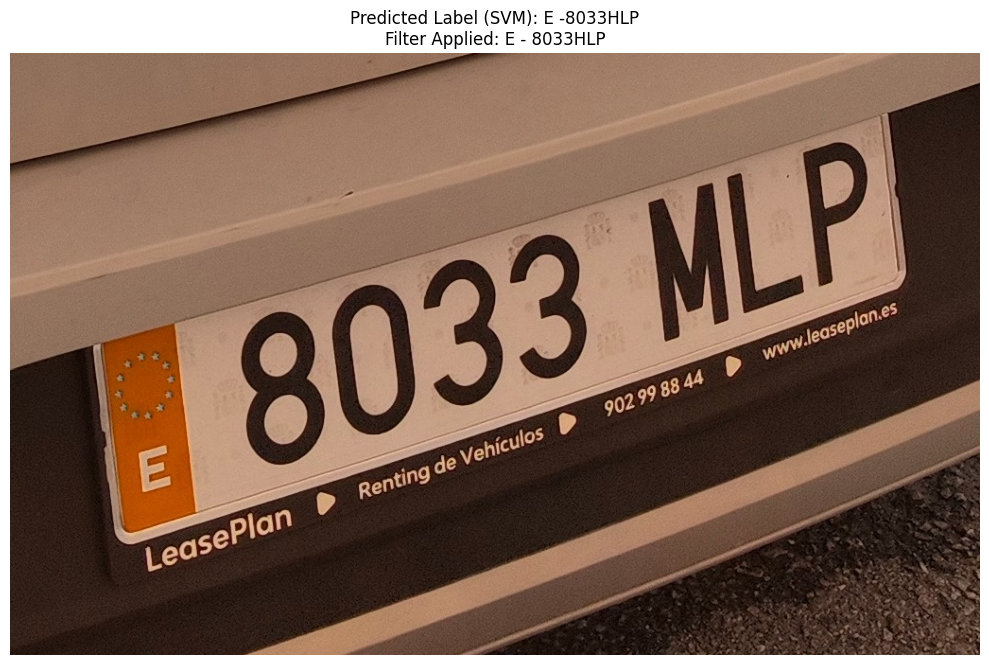

In [74]:
import matplotlib.pyplot as plt
plate_sol = svc.test_preprocessed_images_with_plot(clf, scaler, characters, label_encoder)

filter_plate = r.filter_spain_plates(plate_sol)

plt.imshow(car, cmap='gray')
plt.title(f"Predicted Label (SVM): {plate_sol}\nFilter Applied: {filter_plate}")
plt.axis('off')  
plt.tight_layout() 
plt.show()

In [79]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# Definir las transformaciones (normalización y redimensionado)
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convertir a escala de grises
    transforms.Resize((28, 28)),                  # Redimensionar a 28x28 píxeles
    transforms.ToTensor(),                        # Convertir a tensor
    transforms.Normalize((0.5,), (0.5,))          # Normalizar entre -1 y 1
])

# Cargar el dataset (organiza tu carpeta con subcarpetas para cada clase)
dataset = ImageFolder(root= base_path_miguel, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Para verificar las clases:
print(f"Classes: {dataset.classes}")

# Verificar número de clases en el dataset
num_classes = len(dataset.classes)

# Crear el modelo
model = cnn.CNNModel(num_classes)

# Definir la función de pérdida y el optimizador
criterion = cnn.nn.CrossEntropyLoss()  # Para clasificación multi-clase
optimizer = cnn.optim.Adam(model.parameters(), lr=0.001)

model.to(cnn.device)

Classes: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'E -', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'NL -', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [81]:
# Entrenar el modelo
cnn.train_model(model, train_loader, criterion, optimizer, num_epochs=30)
cnn.evaluate_model(model,test_loader)

Epoch [1/30], Loss: 3.5152400840412485
Epoch [2/30], Loss: 3.1412955847653476
Epoch [3/30], Loss: 2.157755895094438
Epoch [4/30], Loss: 1.278374363075603
Epoch [5/30], Loss: 0.7188450992107391
Epoch [6/30], Loss: 0.48211858760226856
Epoch [7/30], Loss: 0.2999029362743551
Epoch [8/30], Loss: 0.17118327404287728
Epoch [9/30], Loss: 0.1331362145190889
Epoch [10/30], Loss: 0.19179094311865894
Epoch [11/30], Loss: 0.22570581937378104
Epoch [12/30], Loss: 0.12056832218712027
Epoch [13/30], Loss: 0.0690689232539047
Epoch [14/30], Loss: 0.08622817013582046
Epoch [15/30], Loss: 0.11348787034777078
Epoch [16/30], Loss: 0.09836952930146997
Epoch [17/30], Loss: 0.04436700416474857
Epoch [18/30], Loss: 0.05543269149281762
Epoch [19/30], Loss: 0.0689799267036671
Epoch [20/30], Loss: 0.0633972302841192
Epoch [21/30], Loss: 0.023542396957054734
Epoch [22/30], Loss: 0.014721689470620318
Epoch [23/30], Loss: 0.016126369930465113
Epoch [24/30], Loss: 0.011728575209748338
Epoch [25/30], Loss: 0.0095949572

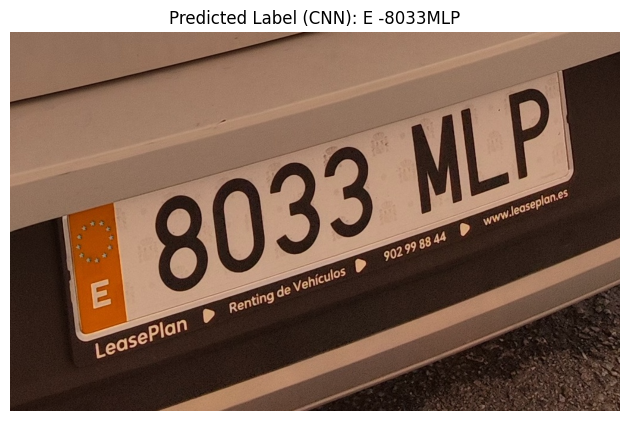

In [85]:
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Función para preprocesar la imagen de un carácter
def preprocess_character_image(char_image):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  # Convertir a escala de grises
        transforms.Resize((28, 28)),                  # Redimensionar a 28x28 píxeles
        transforms.ToTensor(),                        # Convertir a tensor
        transforms.Normalize((0.5,), (0.5,))          # Normalizar entre -1 y 1
    ])
    
    char_image = Image.fromarray(char_image)  # Convertir array NumPy a imagen PIL
    return transform(char_image).unsqueeze(0)  # Añadir una dimensión extra para el batch

# Función para predecir los caracteres en una lista de imágenes de caracteres
def predict_characters(model, character_list, label_encoder):
    model.eval()  # Cambiar a modo de evaluación
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    plate = ''  # Guardar la matrícula predicha

    for i, char_image in enumerate(character_list):
        # Preprocesar cada imagen de carácter
        preprocessed_image = preprocess_character_image(char_image).to(device)

        with torch.no_grad():  # No necesitamos gradientes en evaluación
            outputs = model(preprocessed_image)  # Pasar la imagen por el modelo
            _, predicted_index = torch.max(outputs, 1)  # Obtener la predicción
            predicted_label = label_encoder.inverse_transform([predicted_index.item()])[0]  # Decodificar la predicción

            # Agregar el carácter predicho a la cadena de la matrícula
            plate += predicted_label

    return plate

# Crear el codificador de etiquetas (para decodificar las predicciones)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(dataset.classes)  # Usamos las clases del dataset para el encoder

# Predecir caracteres
predicted_plate = predict_characters(model, characters, label_encoder)

plt.imshow(car, cmap='gray')
plt.title(f"Predicted Label (CNN): {predicted_plate}")
plt.axis('off')  
plt.tight_layout() 
plt.show()


In [6]:
path = "G://.shortcut-targets-by-id//1xjrivG-T7lph1wnu1KGxnsESEs0U5vvV//LICENSE_PLATES_RECOGITION_L&V//Dataset Characters"
output_file = "folder_counts.csv"
r.count_files_in_folders(path, output_file)

Data has been saved to folder_counts.csv
